import numpy as np

from experiment.toolkits.image_acquisition_and_processing.image_toolkit.image_processing import ImageProcessing
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt
from experiment.toolkits.figure_formatting.formatter import *
#from experiment.toolkits.statistical_analysis.statistical_analysis import *

styles=['/home/tqtraaqs/Desktop/tqtraaq_git/matplotlibrc/styles/TQT-RAAQS.mplstyle']

In [2]:
import pandas as pd

In [3]:
file_folder = '/home/tqtraaqs/Desktop/2022-04-07_Andor/'
data = pd.read_csv(file_folder + 'gain_480.asc', delimiter='\t', encoding='ascii', header=None)

In [4]:
data_np = np.array(data.iloc[:, 1:-1])

In [5]:
data_np_reshaped = data_np.reshape(1024, 1024, 100)

In [6]:
mean_im = np.mean(data_np_reshaped, axis=2)

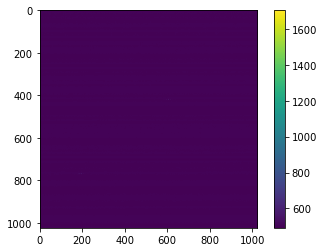

In [7]:
plt.imshow(np.mean(data_np_reshaped, axis=2))
plt.colorbar()

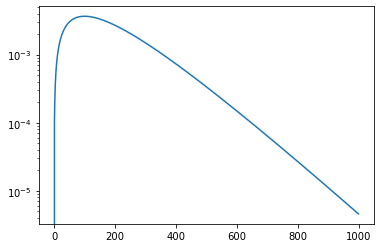

In [8]:
xs = np.arange(1000)
def erlang_(x, g, n):
    return 1 / (g ** n * np.math.factorial(n-1)) * np.exp(-x / g) * x ** (n-1)
plt.plot(xs, erlang_(xs, 100, 2))
plt.yscale('log')

In [9]:
np.mean(mean_im)

500.8284856414793

In [10]:
def plot_data(distribution, params, title):
    with plt.style.context(styles):

        fig = plt.figure(dpi=200)
        gs = GridSpec(1, 1, figure=fig)
        fig.add_subplot(gs[0, 0])
        ax = fig.axes

        series_params={
        'bins': 2200, 
        'range': (np.min(distribution), np.max(distribution)),
        'density': False,
        'mass_function': False,
        'density_multiplier': 100
        }
        
        set_palette(ax[0], '2', plot_type='histogram')
        plot_distribution(ax[0], x=distribution, series_params=series_params)
        format_plot(ax[0], params)
        
    #     print(dir(ax[0].yaxis.get_label().get_position(original=True)))
        format_figure(
            gs, 
            axes_params={
            'right_spacing': 2.5
            })
        plt.title(title)
        plt.show()
    return ax

/home/tqtraaqs/Desktop/tqtraaq_git/Experiment/experiment/toolkits/figure_formatting/formatter.py:752: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  set_lim(lower_lim - epsilon * (upper_lim - lower_lim), upper_lim + epsilon * (upper_lim - lower_lim))


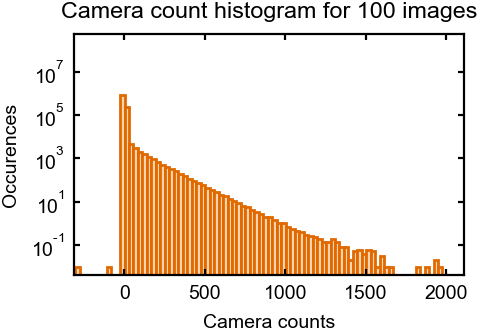

In [11]:
distribution = (data_np_reshaped - np.full(data_np_reshaped.shape, 500.8284856414793)).flatten()
plot_params={
            'xtitle': 'Camera counts',
            'ytitle': 'Occurences',
            'ytickdecimals': 2,
            'xtickdecimals': 0,
            'caption_label': ['b', 'aps'],
            'yscale': 'log',
            'xlim': (-200, 2000),
            'ylim': (1e-2, 5e8)
            }
ax = plot_data(distribution, plot_params, 'Camera count histogram for 100 images')

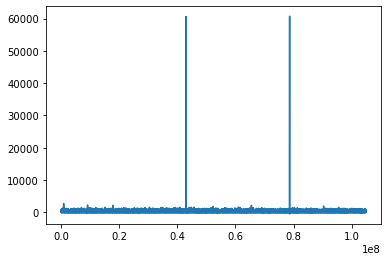

In [14]:
plt.plot(distribution)

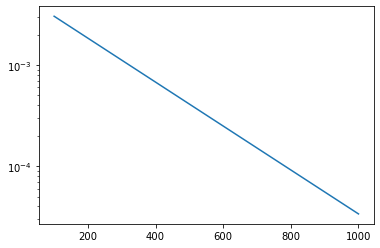

In [50]:
xseries = np.linspace(100, 1000, 1000)
y = erlang_(xseries, 200, 1)
plt.plot(xseries, y)
plt.yscale('log')

In [12]:
# fitting gaussian
from scipy.stats import norm, erlang, gamma
gaussian_dist = distribution[distribution < 20]
linear_dist = distribution[(distribution > 100) & (distribution < 1000)]
hist, bin_edges = np.histogram(
        linear_dist,
        bins=900,
        density=False,
        range=(100, 1000),
    )
hist_scaled = hist / 100
# x = [(bin_edges[i] + bin_edges[i + 1]) / 2 for i in range(len(bin_edges) - 1)]
# width = x[1] - x[0]
# mean, std = norm.fit(gaussian_dist, loc=0)
a, loc, scale = gamma.fit(hist_scaled)
print(a, loc, scale)

0.3641554020882113 -4.453297684640252e-28 20.47081501302288


[7427 7068 7033 7085 6967 6730 6854 6719 6633 6667 6445 6547 6431 6275
 6263 6257 6146 6003 5993 5958 5886 5912 5662 5725 5658 5642 5597 5364
 5387 5431 5375 5285 5256 5115 5052 4961 5018 4993 4779 4818 4706 4608
 4624 4547 4533 4584 4368 4447 4381 4465 4328 4335 4146 4175 4095 4203
 4152 3924 4029 3926 3943 3795 3791 3750 3797 3566 3647 3622 3553 3642
 3527 3477 3486 3475 3433 3390 3444 3260 3298 3293 3126 3117 3097 3176
 3025 3059 3113 3064 2946 2881 2926 2960 2861 2873 2739 2864 2739 2707
 2699 2701 2649 2623 2667 2686 2529 2456 2579 2522 2462 2317 2452 2419
 2374 2364 2323 2270 2201 2295 2255 2202 2222 2161 2143 2204 2141 2150
 2035 2068 1959 2032 2097 2016 1958 1915 1963 1915 1900 1938 1907 1764
 1800 1819 1809 1747 1773 1717 1702 1650 1716 1711 1617 1746 1619 1653
 1581 1512 1577 1568 1558 1554 1495 1538 1522 1480 1401 1388 1497 1418
 1460 1361 1418 1299 1352 1268 1309 1282 1273 1244 1272 1284 1240 1234
 1280 1221 1226 1200 1120 1167 1163 1192 1103 1132 1155 1150 1108 1087
 1075 

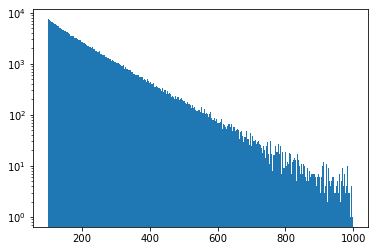

In [65]:
plt.hist(linear_dist, bins=900)
plt.yscale('log')

hist, edges = np.histogram(linear_dist, bins=900)
print(hist)

## Fit to Erlang distribution
Shape: 1 (simplifies to Poisson)
Scale: 47 (expected ~ 400)

In [137]:
np.max(distribution)

1748

/home/tqtraaqs/Desktop/tqtraaq_git/Experiment/experiment/toolkits/figure_formatting/formatter.py:756: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  set_lim(new_lim)


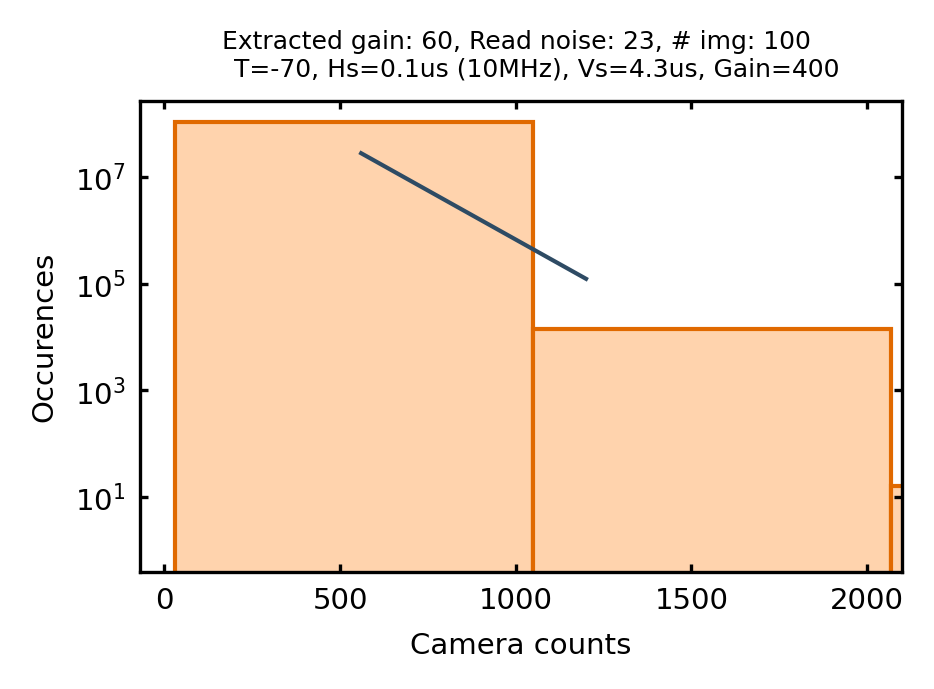

In [41]:
distribution = (data_np_reshaped).flatten()
plot_params={
            'xtitle': 'Camera counts',
            'ytitle': 'Occurences',
            'ytickdecimals': 2,
            'caption_label': ['b', 'aps'],
            'yscale': 'log',
            'xlim': (np.min(distribution), 2000),
            # 'xticks': np.linspace(300, 1800, 7),
            'xtickdecimals': 0,

            # 'ylim': (1e-3, 1e8)
            }
with plt.style.context(styles):

    fig, ax, gs = get_subplots((1, 1))

    series_params={
    'bins': 60, 
    'range': (np.min(distribution), np.max(distribution)),
    'density': False,
    'mass_function': False
    }
    
    set_palette(ax[0], '2', plot_type='histogram')
    plot_distribution(ax[0], x=distribution, series_params=series_params)

    xseries_gauss = np.linspace(np.min(distribution), 560, 1000)
    xseries_poisson = np.linspace(560, 1200, 1000)

    format_plot(ax[0], plot_params)
    set_palette(ax[0], '1')
    plot_curve(ax[0], xseries_gauss, norm.pdf(xseries_gauss, mean, std) * np.sum(hist) * width)
    plot_curve(ax[0], xseries_poisson, erlang_(xseries_poisson, scale, 1) * np.sum(hist_lin) * 5e5)
    
#     print(dir(ax[0].yaxis.get_label().get_position(original=True)))
    format_figure(
        gs, 
        axes_params={
        'right_spacing': 1
        })
    ax[0].set_title('''Extracted gain: 60, Read noise: 23, # img: 100 
    T=-70, Hs=0.1us (10MHz), Vs=4.3us, Gain=400''', fontsize=6)

plt.show()

In [131]:
np.sum(hist_lin)

177752

Text(0.5, 1.0, 'Histogram of camera counts, T = -50 C, EM gain = 300')

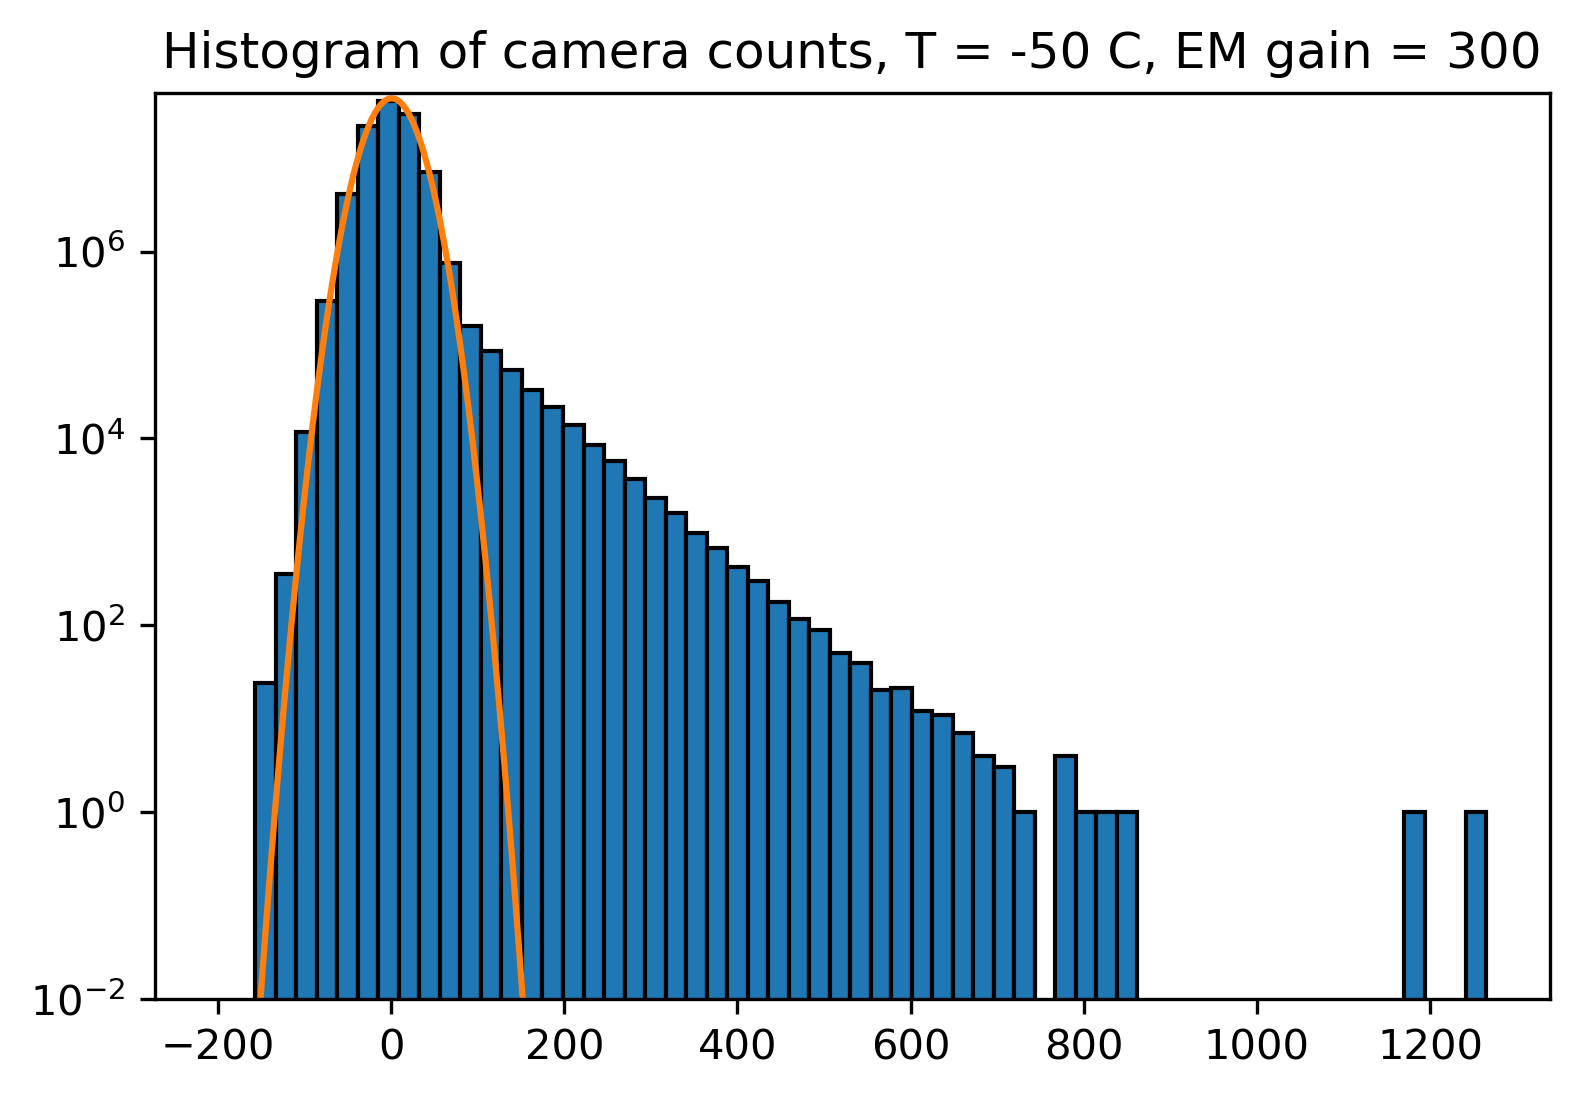

In [68]:
x_range1 = np.linspace(-200, 200, 560)
x_range2 = np.linspace(500, 1000, 500)
plt.figure(dpi=300)
plt.hist(distribution, 60, edgecolor='black')
plt.plot(x_range1, norm.pdf(x_range1, mean, std) * np.sum(hist) * width)
plt.plot(x_range2, erlang_(x_range2, 47.77, 1))
plt.yscale('log')
plt.ylim(0.01, 5*10**7)
plt.title('Histogram of camera counts, T = -50 C, EM gain = 300')

In [ ]:
norm.pdf()

/home/tqtraaqs/Desktop/tqtraaq_git/Experiment/experiment/toolkits/figure_formatting/formatter.py:747: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  set_lim(new_lim)


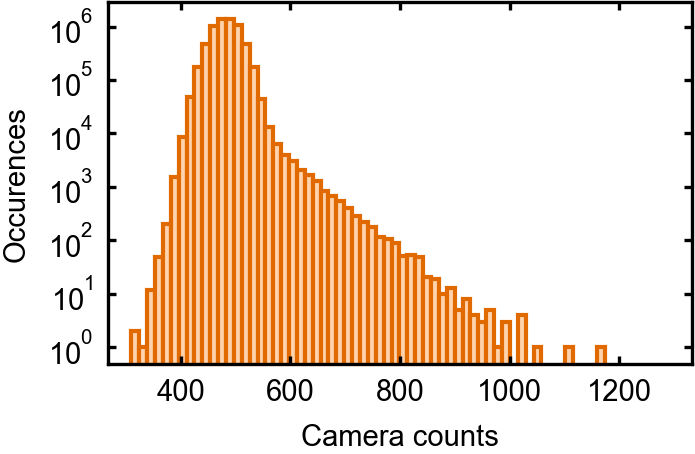

In [12]:
plot_params={
            'xtitle': 'Camera counts',
            'ytitle': 'Occurences',
            'ytickdecimals': 2,
            'xtickdecimals': 0,
            'caption_label': ['b', 'aps'],
            'yscale': 'log',
            }

with plt.style.context(styles):
    fig, ax, gs = get_subplots((1, 1))
    
    series_params={
        'bins': 60, 
        'range': (np.min(distribution), np.max(distribution)),
        'density': False,
        }
    
    set_palette(ax[0], '2', plot_type='histogram')
    plot_distribution(ax[0], x=distribution, series_params=series_params)
    format_plot(ax[0], plot_params)

    format_figure(
    gs, 
    axes_params={
    'right_spacing': 2.5
    })
    plt.show()

In [17]:
print(mean, std)

478.5810888959953 23.572029680182062
